In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit
import struct,os
from array import array as pyarray
from numpy import append, array, int8, uint8, zeros

def load_mnist(image_file, label_file):
    digits=np.arange(10)

    fname_image = os.path.join("../"+image_file)
    fname_label = os.path.join("../"+label_file)

    flbl = open(fname_label, 'rb')
    magic_nr, size = struct.unpack(">II", flbl.read(8))
    lbl = pyarray("b", flbl.read())
    flbl.close()

    fimg = open(fname_image, 'rb')
    magic_nr, size, rows, cols = struct.unpack(">IIII", fimg.read(16))
    img = pyarray("B", fimg.read())
    fimg.close()

    ind = [ k for k in range(size) if lbl[k] in digits ]
    N = len(ind)

    images = zeros((N, rows*cols), dtype=uint8)
    labels = zeros((N, 1), dtype=int8)
    for i in range(len(ind)):
        images[i] = array(img[ ind[i]*rows*cols : (ind[i]+1)*rows*cols ]).reshape((1, rows*cols))
        labels[i] = lbl[ind[i]]

    return images, labels


train_image, train_label = load_mnist("train-images.idx3-ubyte", "train-labels.idx1-ubyte")
test_image, test_label = load_mnist("t10k-images.idx3-ubyte", "t10k-labels.idx1-ubyte")
train_image=train_image[:5000]
train_label=train_label[:5000]


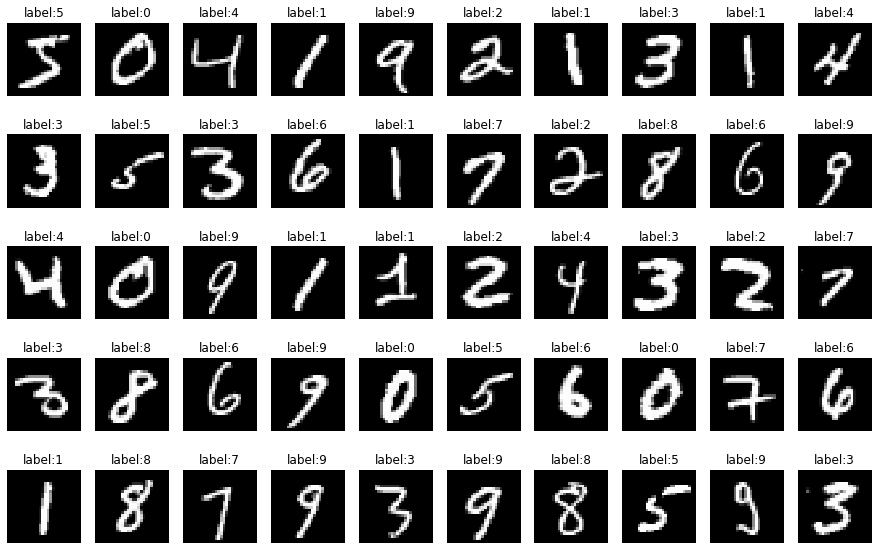

In [2]:
import matplotlib.pyplot as plt

def show_image(imgdata,imgtarget,show_column):
    show_row=len(imgdata)//show_column
    for index,(im,it) in enumerate(list(zip(imgdata,imgtarget))):
        xx = im.reshape(28,28)
        plt.subplots_adjust(left=1, bottom=None, right=3, top=2, wspace=None, hspace=None)
        plt.subplot(show_row, show_column, index+1)
        plt.axis('off')
        plt.imshow(xx , cmap='gray',interpolation='nearest')
        plt.title('label:%i' % it)
show_image(train_image[:50], train_label[:50], 10)

In [17]:
hidden_size=20*20
gama=np.random.rand(hidden_size)-0.5
#print(gama.shape)
out_size=10
theta=np.random.rand(out_size)-0.5
v=np.random.rand(train_image.shape[1],hidden_size)-0.5
#print("v's shape",v.shape)
w=np.random.rand(hidden_size,out_size)-0.5

ty=np.zeros([train_image.shape[0],out_size])
for i in range(train_image.shape[0]):
    ty[i][train_label[i]]=1.0
print(theta.shape)

(10,)


In [4]:
def predict(img):
    return expit(expit(img.dot(v)-gama).dot(w)-theta)


In [56]:
def print_genaralization_error():
    err=0
    for i in range(test_image.shape[0]):
        Y=predict(test_image[i])
        ans=0
        mx=Y[0]
        for j in range(len(Y)):
            if Y[j]>mx:
                mx=Y[j]
                ans=j
        if test_label[i]!=ans:
            # plt.gray()
            # plt.matshow(test_image[i].reshape(28,-1))
            # plt.show()
            # print("%d pred %d truth %d"% (i,ans,test_label[i]))
            err+=1
    print("%.10lf"%(1-err/test_image.shape[0]))
print_genaralization_error()

0.8633000000


In [57]:
def print_train_error():
    err=0
    for i in range(train_image.shape[0]):
        Y=predict(train_image[i])
        ans=0
        mx=Y[0]
        for j in range(len(Y)):
            if Y[j]>mx:
                mx=Y[j]
                ans=j
        if train_label[i]!=ans:
            # plt.gray()
            # plt.matshow(test_image[i].reshape(28,-1))
            # plt.show()
            # print("%d pred %d truth %d"% (i,ans,test_label[i]))
            err+=1
    print("%.10lf"%(1-err/train_image.shape[0]))
print_train_error()

0.9710000000


In [55]:
alpha=0.00005
T=20000
while T>0:
    b=expit(train_image.dot(v)-gama)
    y=expit(b.dot(w)-theta)
    g=y*(1-y)*(ty-y)
    e=b*(1-b)*(g.dot(w.T)) # (w*(g^T))^T=g*(w^T)
    w+=alpha*(b.T).dot(g)
    v+=alpha*(train_image.T).dot(e)
    theta-=alpha*(g.sum(axis=0))
    gama-=alpha*(e.sum(axis=0))
    # print(theta)
    T-=1
    if(T%1000==0):
        print(T)
        print_train_error()
        

19000
0.8838000000
18000
0.8836000000
17000
0.8842000000
16000
0.8848000000
15000
0.8850000000
14000
0.8852000000
13000
0.8860000000
12000
0.8866000000
11000
0.9516000000
10000
0.9612000000
9000
0.9644000000
8000
0.9662000000
7000
0.9666000000
6000
0.9680000000
5000
0.9682000000
4000
0.9684000000
3000
0.9692000000
2000
0.9698000000
1000
0.9706000000
0
0.9710000000


In [58]:
np.savez("trained.npz",v_theta=theta,v_gamma=gama,m_w=w,m_v=v)

In [ ]:
plt.gray()
plt.matshow(test_image[0].reshape(28,-1))
plt.show()

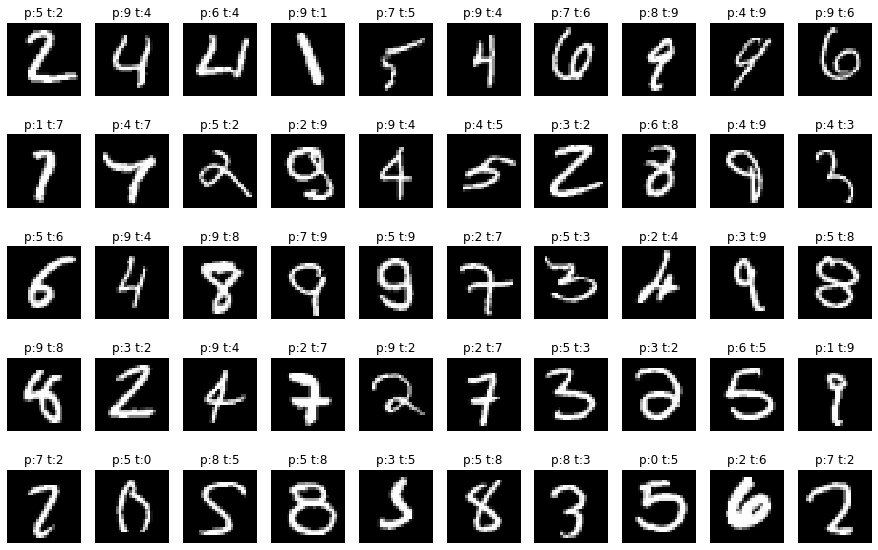

1367/10000


In [62]:
err=0
for i in range(test_image.shape[0]):
    Y=predict(test_image[i])
    ans=0
    mx=Y[0]
    for j in range(len(Y)):
        if Y[j]>mx:
            mx=Y[j]
            ans=j
    if test_label[i]!=ans:
        err+=1
        if err<=50:
            plt.subplots_adjust(left=1, bottom=None, right=3, top=2, wspace=None, hspace=None)
            plt.subplot(5, 10, err)
            plt.axis('off')
            plt.imshow(test_image[i].reshape(28,-1) , cmap='gray',interpolation='nearest')
            plt.title("p:%d t:%d"% (ans,test_label[i]))
plt.show()
print(str(err)+"/"+str(test_image.shape[0]))

In [63]:
v.shape

(784, 400)

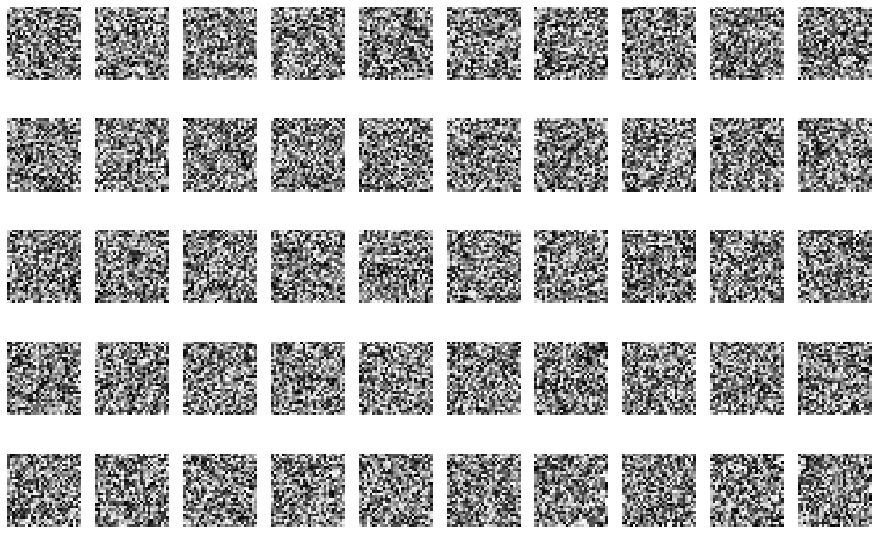

In [67]:
hidden=v.T[:50]
for index,im in enumerate(list(hidden)):
        xx = im.reshape(28,28)
        plt.subplots_adjust(left=1, bottom=None, right=3, top=2, wspace=None, hspace=None)
        plt.subplot(5, 10, index+1)
        plt.axis('off')
        plt.imshow(xx , cmap='gray',interpolation='nearest')